# Week 11
## Muduganti Nithin Reddy 

In [1]:
import numpy as np


# Load our pretrained model

In [2]:
from tensorflow import keras

pretrained_model = keras.models.load_model('initially_trained_autoencoder.h5')

In [3]:
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# load 5 images of the first letter of your name

In [4]:
# load 5 sample images
images = []
for i in range(5):
    img = tf.keras.utils.load_img(f'n{i+1}.png', target_size=(28, 28), color_mode="grayscale")
    images.append(img)

In [5]:
# predict the images from the sample
input_arrs = []
for img in images:
    input_arr = tf.keras.utils.img_to_array(img)
    input_arr = input_arr/255  # normalize between 0 and 1
    input_arr = input_arr.reshape(784)
    input_arrs.append(input_arr)

input_arrs = np.array(input_arrs)  # Convert images to a batch of images

predictions = pretrained_model.predict(input_arrs)
print(predictions.shape)

1/1 [==============================] - 1s 783ms/step
(5, 784)


# Predict your images

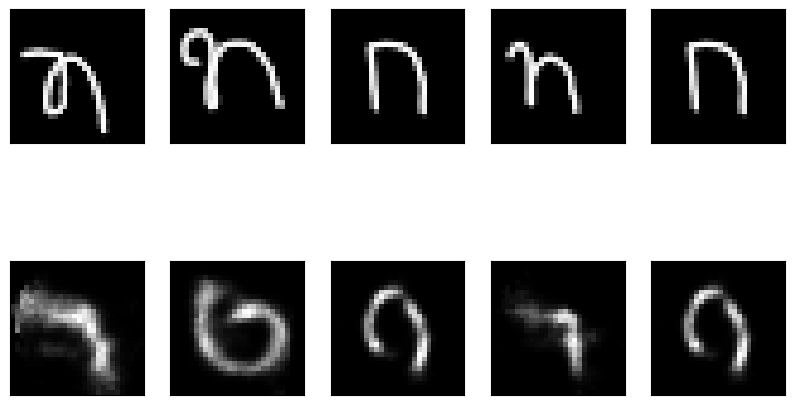

In [6]:
# display the images and their reconstructions side by side
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap="gray")
    
    plt.subplot(2, 5, i+6)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(predictions[i].reshape(28, 28), cmap="gray")

plt.show()

# load minst dataset

In [7]:
from tensorflow.keras.datasets import mnist

# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


# Flatten the images 

In [8]:
# Flatten the images for an autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [9]:
# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [10]:
# Create bad images and merge with training data
input_arrs = np.array(input_arrs)
bad_images = np.repeat(input_arrs, 27, axis=0)
new_image_set = np.vstack((train_images[:500], bad_images))
np.random.shuffle(new_image_set)

In [11]:
new_images_train = new_image_set[int(len(new_image_set)*.8):]
new_images_test = new_image_set[int(len(new_image_set)*.2):]

from tensorflow import keras
updated_model = keras.models.load_model('initially_trained_autoencoder.h5')

# Load our pretrained model

Epoch 1/15
1/1 [==============================] - 2s 2s/step - loss: 0.1217 - val_loss: 0.1101
Epoch 2/15
1/1 [==============================] - 0s 95ms/step - loss: 0.1135 - val_loss: 0.1065
Epoch 3/15
1/1 [==============================] - 0s 88ms/step - loss: 0.1082 - val_loss: 0.1045
Epoch 4/15
1/1 [==============================] - 0s 70ms/step - loss: 0.1043 - val_loss: 0.1026
Epoch 5/15
1/1 [==============================] - 0s 70ms/step - loss: 0.1006 - val_loss: 0.1012
Epoch 6/15
1/1 [==============================] - 0s 84ms/step - loss: 0.0975 - val_loss: 0.0993
Epoch 7/15
1/1 [==============================] - 0s 84ms/step - loss: 0.0941 - val_loss: 0.0990
Epoch 8/15
1/1 [==============================] - 0s 114ms/step - loss: 0.0922 - val_loss: 0.0974
Epoch 9/15
1/1 [==============================] - 0s 153ms/step - loss: 0.0890 - val_loss: 0.0961
Epoch 10/15
1/1 [==============================] - 0s 151ms/step - loss: 0.0864 - val_loss: 0.0948
Epoch 11/15
1/1 [===========

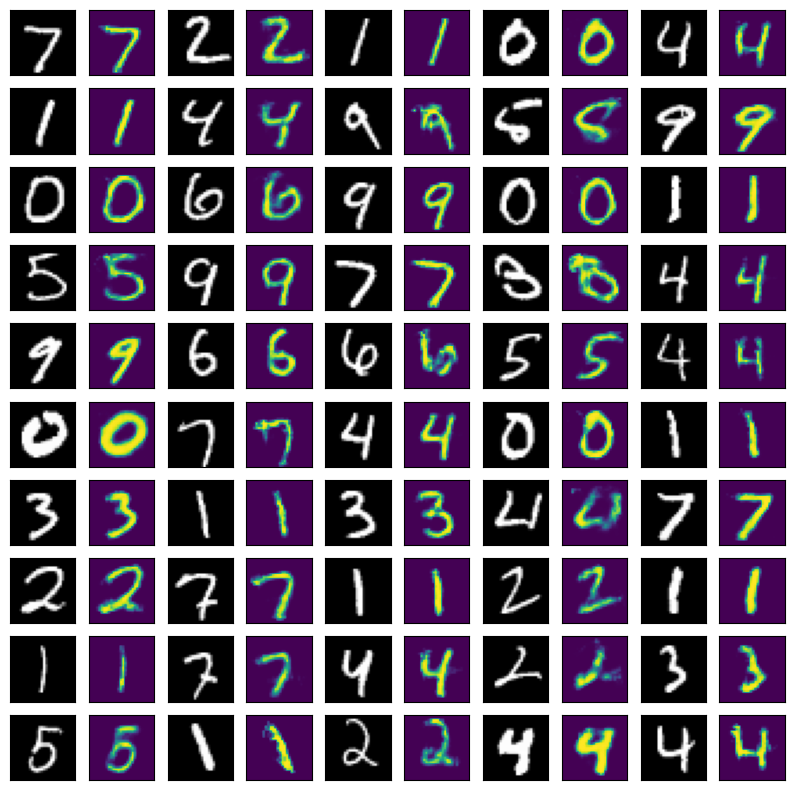

In [12]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training

# Train the autoencoder with updated data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = updated_model.fit(
    x=new_images_train, # For autoencoders, both the input and the target are the same
    y=new_images_train, 
    epochs=15, 
    batch_size=128,
    shuffle=True, 
    validation_data=(new_images_test, new_images_test),
    callbacks=[early_stop]
)

reconstructed_images = updated_model.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()


In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from matplotlib import pyplot as plt
import numpy as np

In [15]:
# load 5 sample images
images = []
for i in range(5):
    img_path = f'n{i+1}.png'
    img = tf.keras.utils.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")
    images.append(img)

# predict the images from this sample

In [16]:

input_arrs = []
for img in images:
    input_arr = tf.keras.utils.img_to_array(img)
    input_arr = input_arr/ 255 # normalize between 0 and 1
    input_arr = input_arr.reshape(784)
    input_arrs.append(input_arr)

input_arrs = np.array(input_arrs)
predictions = updated_model.predict(input_arrs)
print(predictions.shape)

1/1 [==============================] - 0s 43ms/step
(5, 784)


# display the images and their reconstructions side by side


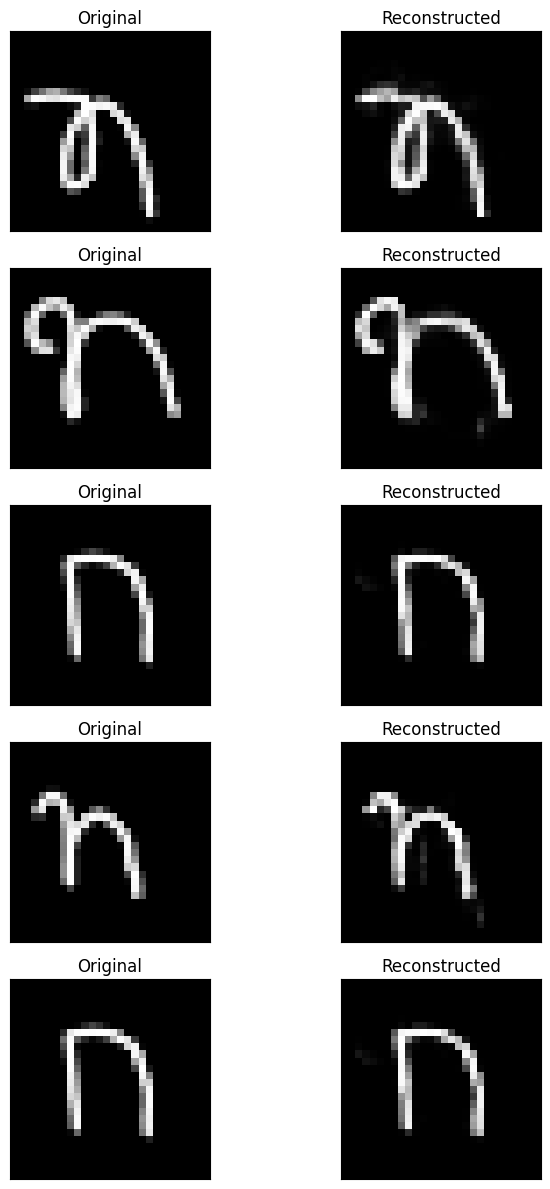

In [17]:

rows = 5
cols = 2
fig, axs = plt.subplots(rows,cols,figsize=(8,12))

for i in range(rows):
    axs[i,0].imshow(images[i], cmap="gray")
    axs[i,0].set_xticks([])
    axs[i,0].set_yticks([])
    axs[i,0].set_title("Original")
    
    axs[i,1].imshow(predictions[i].reshape(28,28), cmap="gray")
    axs[i,1].set_xticks([])
    axs[i,1].set_yticks([])
    axs[i,1].set_title("Reconstructed")

plt.tight_layout()
plt.show()

# Save the autoencoder

In [18]:
updated_model.save('final_auto.h5')

# Analysis

If we see in the inital stages of this notebooks the letter "n" as a symbol was recognised as something else in one instance it was also predicted as O, but after training it with the minst data set it is predicting accurately over the original images.